# Parsing evaluation

In [ ]:
# Add GDrive
from google.colab import drive
import sys
drive.mount('/content/drive/')
sys.path.append('/content/drive/My Drive/Datasets/Recipe1M/')

In [ ]:
import pandas as pd

recipes = pd.read_pickle('/content/drive/My Drive/Datasets/Recipe1M/2022_01_19/recipes_valid_full.pkl')
ingredient_list = pd.DataFrame(recipes.ingredients)

In [ ]:
ingredients, amounts, units, ids = []
for idx, elem in ingredient_list.iterrows():
    for row in elem:
        for _, sub in row.iterrows():
          ingredients.append(sub.ingredient)
          amounts.append(sub.amount)
          units.append(sub.unit)
          ids.append(idx)

In [ ]:
df = pd.DataFrame(
    {'id': ids,
     'amount': amounts,
     'unit': units,
     'ingredient': ingredients
    })
df.to_pickle('/content/drive/My Drive/Datasets/Recipe1M/2022_01_19/parsing_analysis.pkl')


In [31]:
import pandas as pd
data = pd.read_pickle('~/Downloads/parsing_analysis-2.pkl')

In [2]:
# All units that exist in parsed data
print(pd.Series.unique(data.unit))

# Recipe IDs which contain a certain unit
unit_ids = {}
# Amount of ingredients in certain unit
unit_amounts = {}
for _, elem in data.iterrows():
    if elem.unit in unit_ids:
        unit_ids[elem.unit].add(elem.id)
        unit_amounts[elem.unit] += 1
    else:
        unit_ids[elem.unit] = set()
        unit_amounts[elem.unit] = 1

['cup' 'tablespoon' 'teaspoon' '' 'pound-mass' 'ounce' 'cubic centimetre'
 'gram' 'package' 'pinch' 'quart' 'drop' 'inch' 'pint' 'litre'
 'fluid ounce' 'tonne' 'kilogram' 'gallon' 'bushel' 'centimetre' 'peck'
 'centilitre' 'mile' 'foot' 'atomic mass unit' 'metre' 'yard' 'decilitre'
 'carat' 'millimetre' 'barn' 'quarter' 'dessertspoon' 'milligram'
 'cubic inch' 'stere' 'short ton' 'barrel' 'cubic metre'
 'astronomical unit']


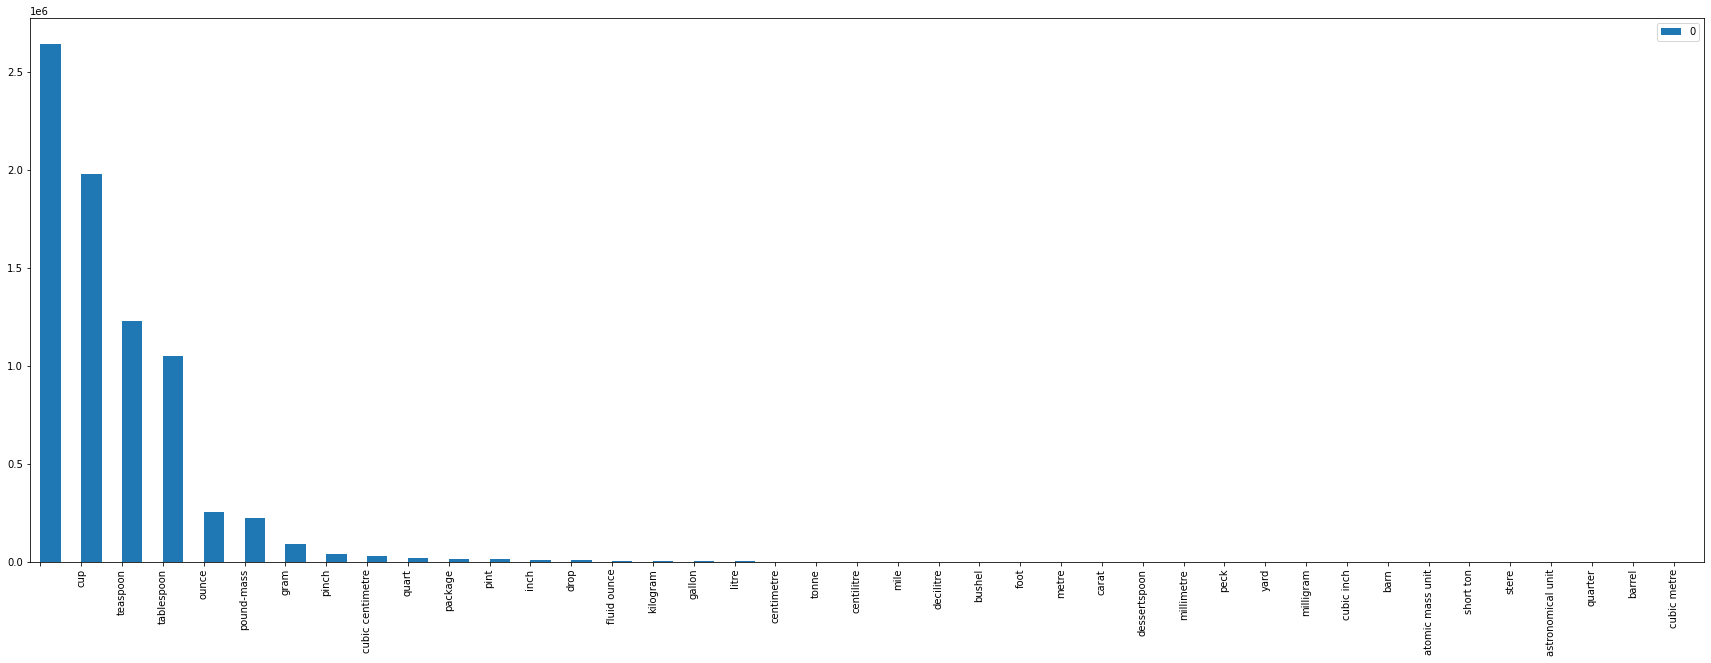

In [32]:
import matplotlib.pyplot as plt
df_amounts = pd.DataFrame([unit_amounts]).transpose().sort_values([0], ascending=False)
df_ids = pd.DataFrame([unit_ids]).transpose()

plot = df_amounts.plot.bar(position=0, figsize=(30,10))
plt.show()


## Findings and post processing measures

* tonne: From looking at a few exapmles this comes from parsing texts like "2T olive oil" which most likely means "tablespoon" --> substitute in post processing
* cubic centimetre: Seems to be parsed from millilitre --> substitute for convenience
* peck: Same as "peck gram" which is already handeled in parser --> substitute "peck" with package